In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from msmbuilder.decomposition import SparseTICA

In [5]:
ds = np.load('bpti-100-dihedral-angles.npz')
X = ds['X']
dims = ds['dims']

[ 0.97309333  0.96861952]


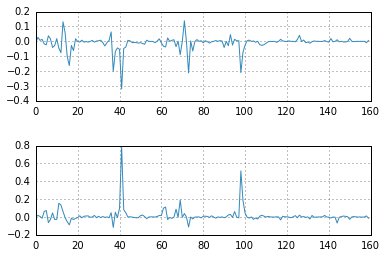

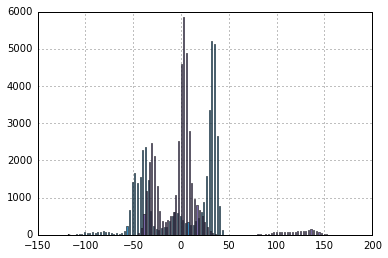

In [6]:
tica = SparseTICA(rho=0.0, n_components=2).fit(X)
print(tica.eigenvalues_)
plt.subplot(2,1,1)
plt.plot(tica.components_[0])
plt.subplot(2,1,2)
plt.plot(tica.components_[1])

plt.figure()
plt.hist(np.concatenate(tica.transform(X)), bins=100)
None

[37 71]
[[CYS38-C ARG39-N ARG39-CA ARG39-C]
 [LYS15-N LYS15-CA LYS15-C ALA16-N]]

[41 98]
[[ARG42-C ASN43-N ASN43-CA ASN43-C]
 [ARG42-N ARG42-CA ARG42-C ASN43-N]]


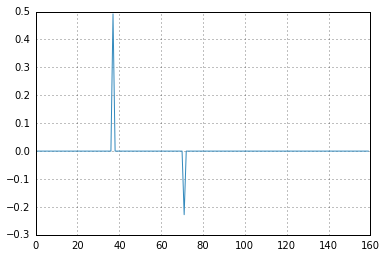

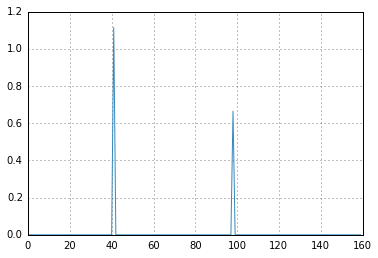

In [7]:
tica = SparseTICA(rho=5e-2, n_components=2).fit(X)
plt.plot(tica.components_[0])
print(np.where(tica.components_[0])[0])
print(dims[np.where(tica.components_[0])[0]])

plt.figure()
plt.plot(tica.components_[1])
print()
print(np.where(tica.components_[1])[0])
print(dims[np.where(tica.components_[1])[0]])

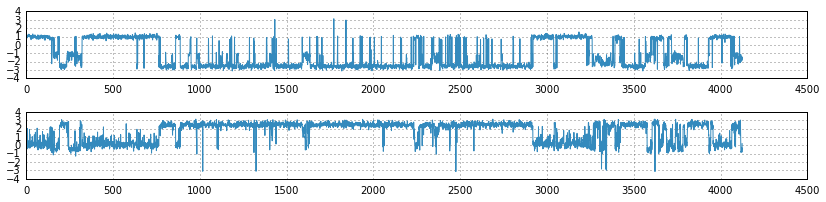

In [109]:
plt.figure(figsize=(14,3))
plt.subplot(2,1,1)
plt.plot(np.concatenate([X[i][:,37] for i in range(42)])[::10], )
plt.subplot(2,1,2)
plt.plot(np.concatenate([X[i][:,71] for i in range(42)])[::10], )

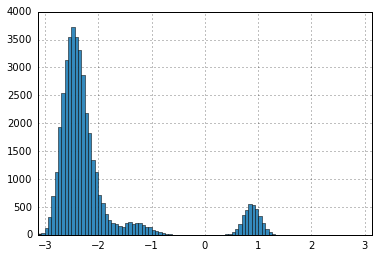

In [8]:
y = np.concatenate([X[i][:,15] for i in range(42)])
plt.hist(y, bins=100)
plt.xlim(-np.pi, np.pi)
None

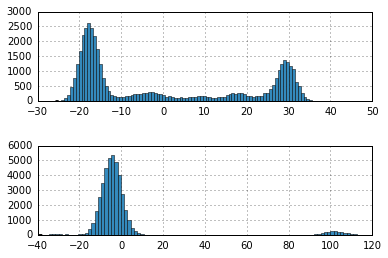

In [9]:
plt.subplot(2,1,1)
plt.hist(np.concatenate(tica.transform(X))[:,0], bins=100)
plt.subplot(2,1,2)
plt.hist(np.concatenate(tica.transform(X))[:,1], bins=100)
None

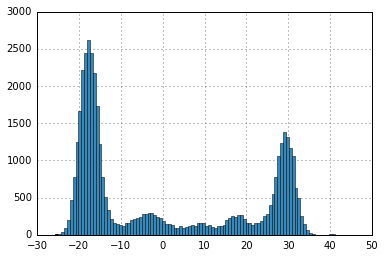

In [50]:
c = tica.transform(X)
n, bins, patches = plt.hist(np.concatenate(c)[:,0], bins=100)

In [64]:
y = n*bins[1:]
ya = bins[1:][np.argmin(y)]
yb = bins[1:][np.argmax(y)]
print(ya)
print(np.argmin([np.min((c[i][:,0]-yb)**2) for i in range(42)]))
print(np.argmin((c[5][:,0]-yb)**2))
c[1][927], c[5][207]

-17.4046319898
5
207


(array([-17.40486367,  -0.75957109]), array([ 29.42712961, -10.0447885 ]))

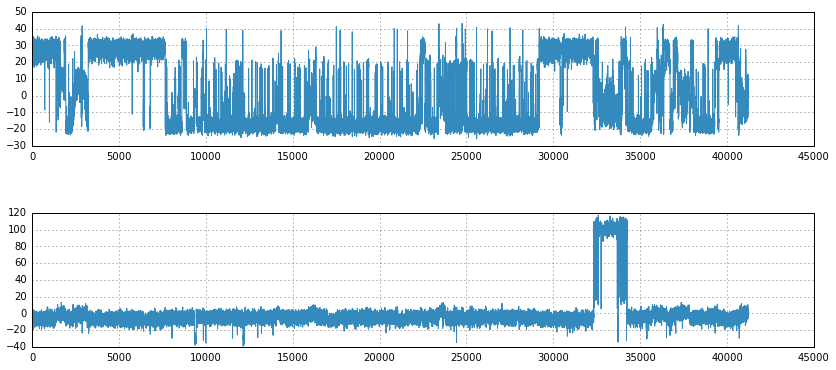

In [67]:
plt.figure(figsize=(14,6))
xy = np.concatenate(tica.transform(X))
plt.subplot(2,1,1)
plt.plot(xy[:,0])
plt.subplot(2,1,2)
plt.plot(xy[:,1])

In [102]:
print(tica.eigenvalues_)

[ 0.95268585  0.95679133]
